### Data Collection and Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('S&P500stock_data.csv')
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
1,Date,NaN,NaN,NaN,NaN,NaN
2,1983-09-19,167.6199951171875,168.08999633789062,166.25999450683594,166.27000427246094,85630000
3,1983-09-20,169.24000549316406,169.3800048828125,167.63999938964844,167.63999938964844,103050000
4,1983-09-21,168.41000366210938,169.3000030517578,168.2100067138672,169.27000427246094,91280000


In [3]:
df = df.drop([0,1])
df = df.reset_index(drop=True)
df = df.rename(columns={'Price':'Date'})
df.head()

,Date,Close,High,Low,Open,Volume
0,1983-09-19,167.6199951171875,168.08999633789062,166.25999450683594,166.27000427246094,85630000
1,1983-09-20,169.24000549316406,169.3800048828125,167.63999938964844,167.63999938964844,103050000
2,1983-09-21,168.41000366210938,169.3000030517578,168.2100067138672,169.27000427246094,91280000
3,1983-09-22,169.75999450683594,169.77999877929688,168.22000122070312,168.39999389648438,97050000
4,1983-09-23,169.50999450683594,170.1699981689453,168.8800048828125,169.75999450683594,93180000


In [4]:
print(df.shape)

(10584, 6)


#### Checking for missing values

In [5]:
print(df.isnull().sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


#### Feature Engineering

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10584 non-null  object
 1   Close   10584 non-null  object
 2   High    10584 non-null  object
 3   Low     10584 non-null  object
 4   Open    10584 non-null  object
 5   Volume  10584 non-null  object
dtypes: object(6)
memory usage: 496.3+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = pd.to_numeric(df[col].astype(str))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10584 entries, 0 to 10583
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10584 non-null  datetime64[ns]
 1   Close   10584 non-null  float64       
 2   High    10584 non-null  float64       
 3   Low     10584 non-null  float64       
 4   Open    10584 non-null  float64       
 5   Volume  10584 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 496.3 KB


In [9]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [10]:
df['Daily_return'] = df['Close'].pct_change()
df.head()

,Date,Close,High,Low,Open,Volume,Day,Month,Year,Daily_return
0,1983-09-19,167.619995,168.089996,166.259995,166.270004,85630000,19,9,1983,NaN
1,1983-09-20,169.240005,169.380005,167.639999,167.639999,103050000,20,9,1983,0.009665
2,1983-09-21,168.410004,169.300003,168.210007,169.270004,91280000,21,9,1983,-0.004904
3,1983-09-22,169.759995,169.779999,168.220001,168.399994,97050000,22,9,1983,0.008016
4,1983-09-23,169.509995,170.169998,168.880005,169.759995,93180000,23,9,1983,-0.001473


#### Moving Avrages or Rolling Mean And Rolling Standard Deviation

In [11]:
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [12]:
df['RSD_20'] = df['Close'].rolling(window=20).std()
df['RSD_50'] = df['Close'].rolling(window=50).std()

In [13]:
df.head()

,Date,Close,High,Low,Open,Volume,Day,Month,Year,Daily_return,MA_20,MA_50,RSD_20,RSD_50
0,1983-09-19,167.619995,168.089996,166.259995,166.270004,85630000,19,9,1983,NaN,NaN,NaN,NaN,NaN
1,1983-09-20,169.240005,169.380005,167.639999,167.639999,103050000,20,9,1983,0.009665,NaN,NaN,NaN,NaN
2,1983-09-21,168.410004,169.300003,168.210007,169.270004,91280000,21,9,1983,-0.004904,NaN,NaN,NaN,NaN
3,1983-09-22,169.759995,169.779999,168.220001,168.399994,97050000,22,9,1983,0.008016,NaN,NaN,NaN,NaN
4,1983-09-23,169.509995,170.169998,168.880005,169.759995,93180000,23,9,1983,-0.001473,NaN,NaN,NaN,NaN


In [14]:
# Droping rows having NAN values
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Date,Close,High,Low,Open,Volume,Day,Month,Year,Daily_return,MA_20,MA_50,RSD_20,RSD_50
0,1983-11-28,166.539993,167.220001,166.210007,167.199997,78210000,28,11,1983,-0.003828,164.954500,166.812399,1.724258,2.484745
1,1983-11-29,167.910004,167.919998,166.169998,166.539993,100460000,29,11,1983,0.008226,165.172500,166.818199,1.810789,2.487006
2,1983-11-30,166.399994,168.070007,166.330002,167.910004,120130000,30,11,1983,-0.008993,165.309499,166.761399,1.793906,2.462880
3,1983-12-01,166.490005,166.770004,166.080002,166.369995,106970000,1,12,1983,0.000541,165.392000,166.722999,1.809055,2.451593
4,1983-12-02,165.440002,166.699997,165.250000,166.490005,93960000,2,12,1983,-0.006307,165.491500,166.636599,1.750396,2.418275


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

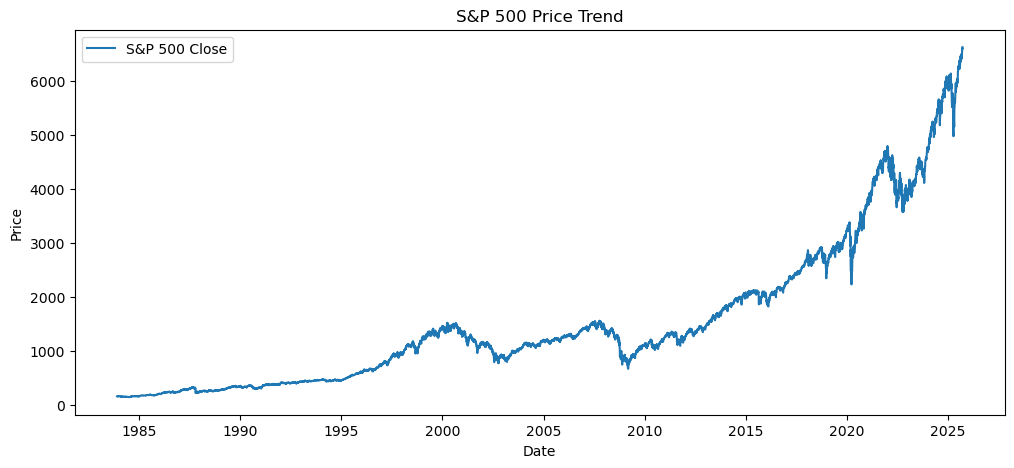

In [16]:
# Closing Price trend
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='S&P 500 Close')
plt.title('S&P 500 Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

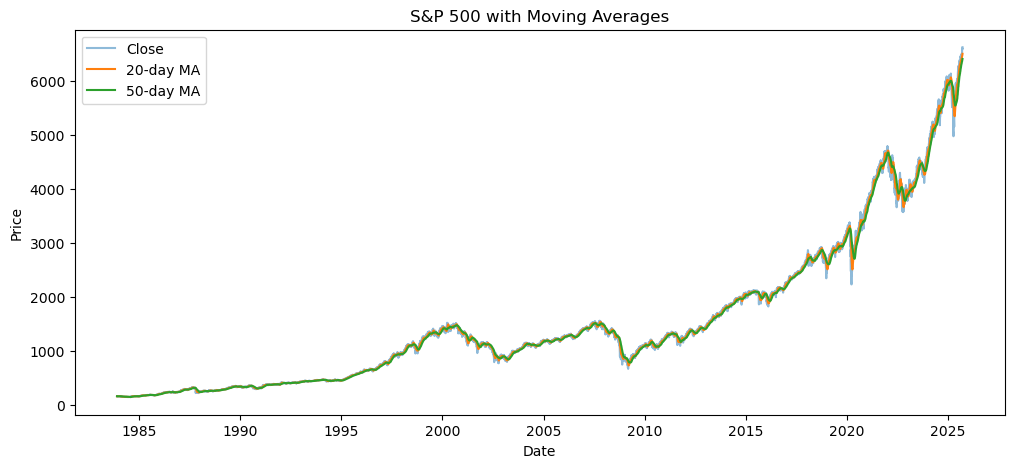

In [17]:
# Moving averages
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.5)
plt.plot(df['Date'], df['MA_20'], label='20-day MA')
plt.plot(df['Date'], df['MA_50'], label='50-day MA')
plt.title('S&P 500 with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

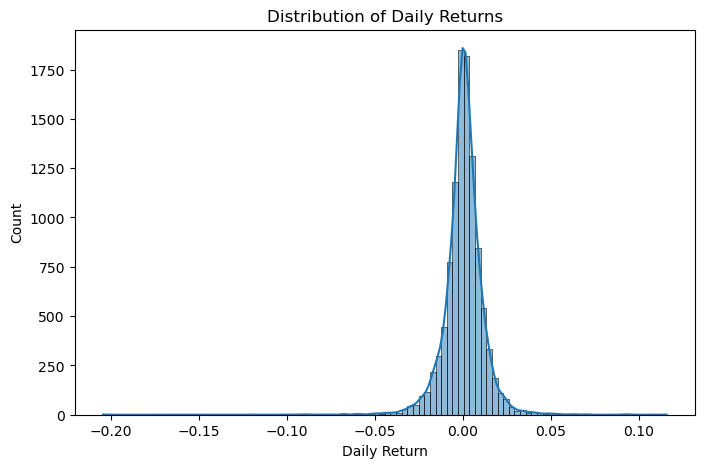

In [18]:
# Returns distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_return'], bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

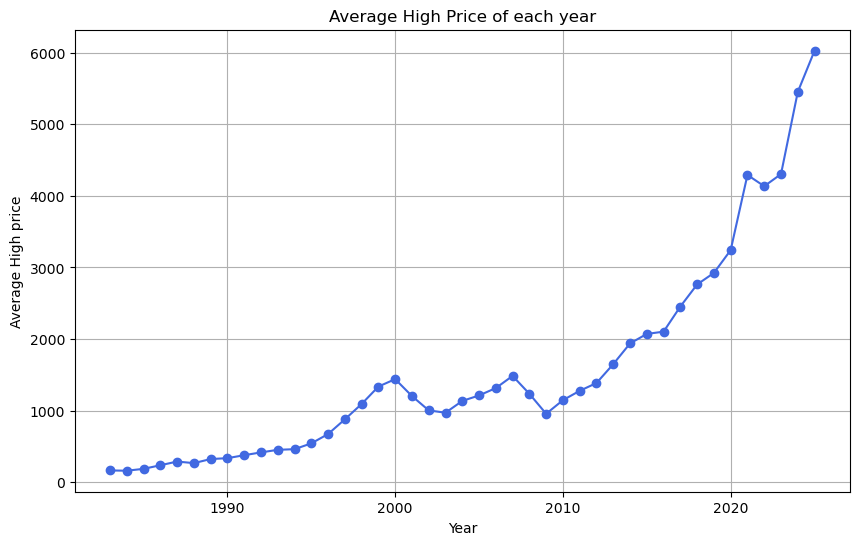

In [19]:
# Groupby year and calculating highest mean price
yearly_high_avg = df.groupby('Year')['High'].mean()
# Plotting
plt.figure(figsize=(10,6))
yearly_high_avg.plot(kind='line', marker='o', color='royalblue')
plt.title('Average High Price of each year')
plt.xlabel('Year')
plt.ylabel('Average High price')
plt.grid(True)
plt.show()

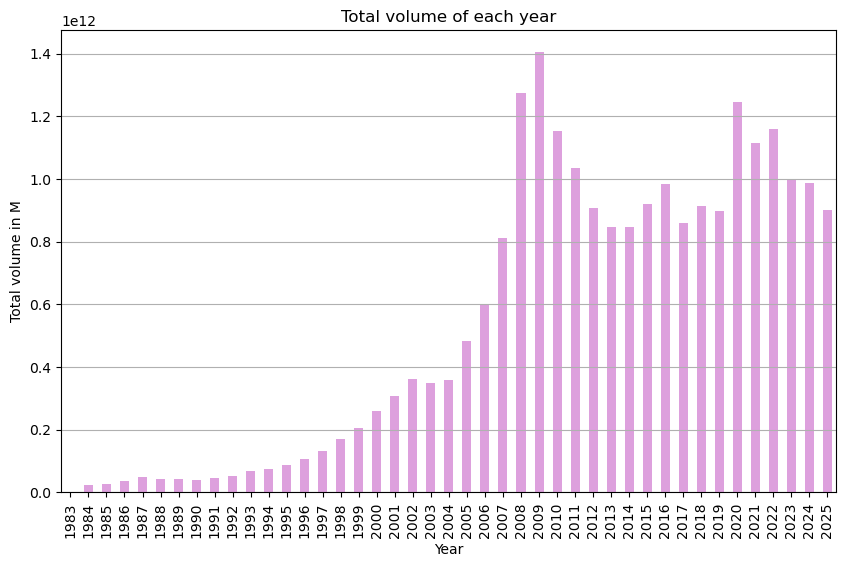

In [20]:
# Groupby year and calculating total volume 
total_vol = df.groupby('Year')['Volume'].sum()
# Plotting
plt.figure(figsize=(10,6))
total_vol.plot(kind='bar', color='plum')
plt.title('Total volume of each year')
plt.xlabel('Year')
plt.ylabel('Total volume in M')
plt.grid(axis='y')
plt.show()

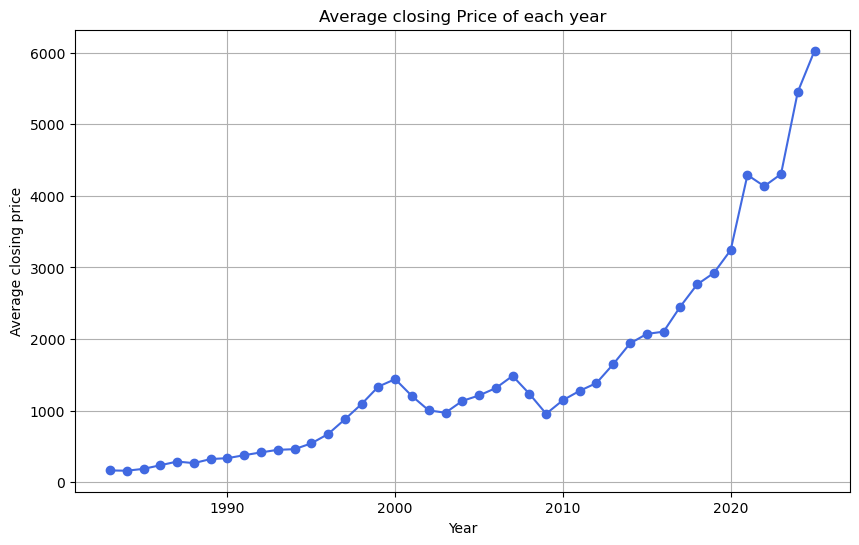

In [21]:
# Groupby year and calculating average closing price
yearly_close_avg = df.groupby('Year')['Close'].mean()
# Plotting
plt.figure(figsize=(10,6))
yearly_high_avg.plot(kind='line', marker='o', color='royalblue')
plt.title('Average closing Price of each year')
plt.xlabel('Year')
plt.ylabel('Average closing price')
plt.grid(True)
plt.show()

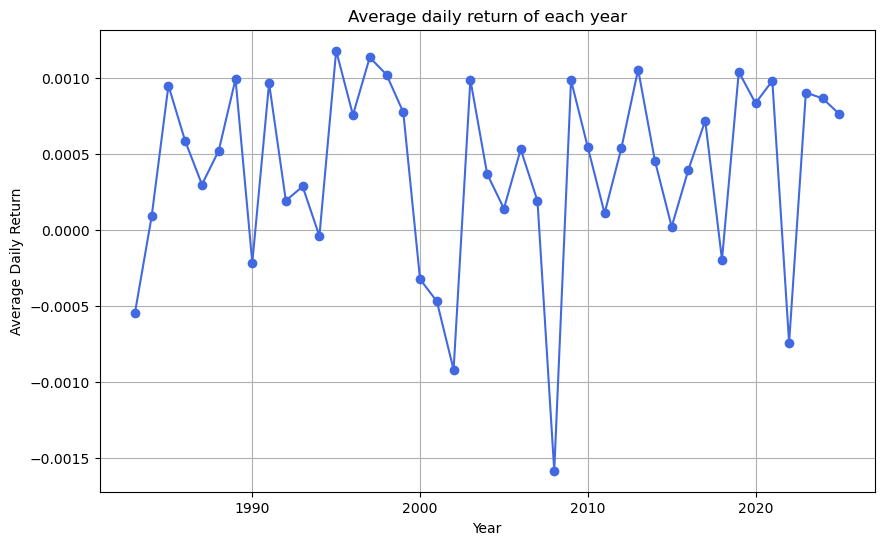

In [22]:
# Groupby year and calculating average daily return
yearly_return_avg = df.groupby('Year')['Daily_return'].mean()
# Plotting
plt.figure(figsize=(10,6))
yearly_return_avg.plot(kind='line', marker='o', color='royalblue')
plt.title('Average daily return of each year')
plt.xlabel('Year')
plt.ylabel('Average Daily Return')
plt.grid(True)
plt.show()

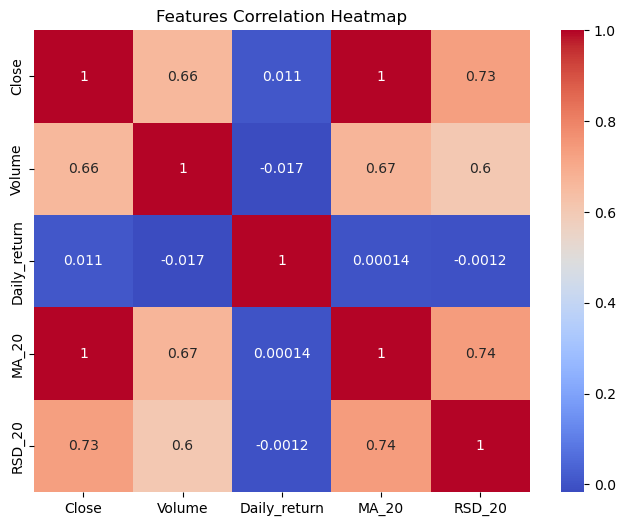

In [23]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Close','Volume','Daily_return','MA_20','RSD_20']].corr(),annot=True, cmap="coolwarm")
plt.title("Features Correlation Heatmap")
plt.show()

#### Seasonal Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
df = df.set_index('Date')

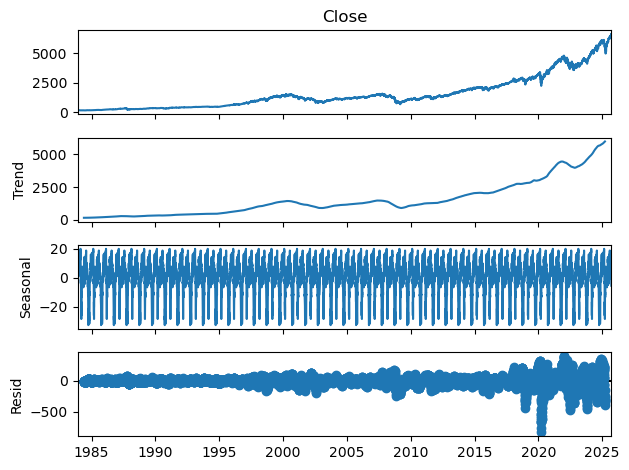

In [26]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
decomposition.plot()
plt.tight_layout()
plt.show()

#### AD Fuller test for checking stationarity of the data

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
adf_result = adfuller(df['Close'], autolag='AIC')

In [29]:
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print('Series is stationary')
else:
    print('Series is NOT stationary')

ADF Statistic: 3.7738338248471073
p-value: 1.0
Series is NOT stationary


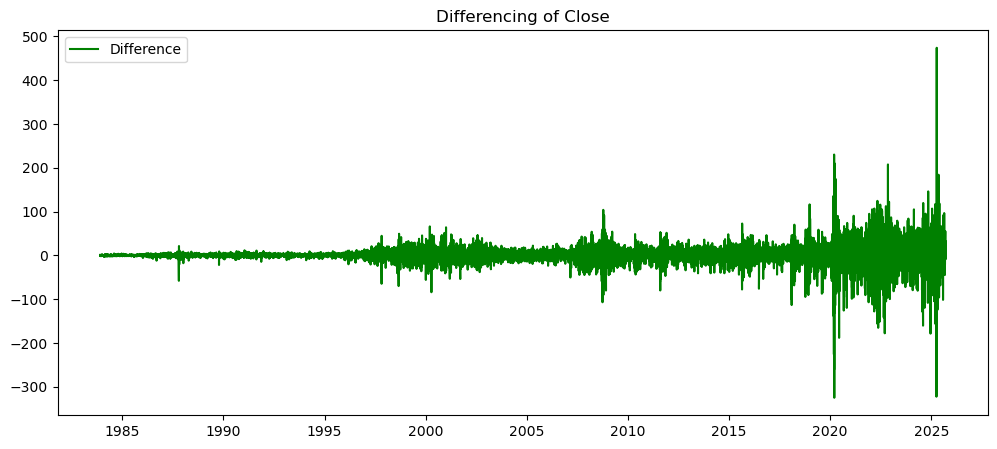

In [30]:
# Differencing
df['Close_diff'] = df['Close'].diff()
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close_diff'], label='Difference', color='green')
plt.title('Differencing of Close')
plt.legend()
plt.show()

In [31]:
adf_result = adfuller(df['Close_diff'].dropna())
print('ADF Statistic :', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print('Stationary after differencing')
else:
    print('Still not stationary')

ADF Statistic : -19.670034853573227
p-value: 0.0
Stationary after differencing


In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

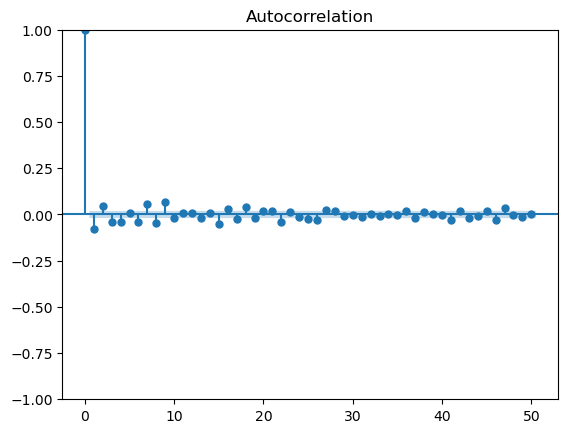

In [33]:
plot_acf(df['Close_diff'].dropna(), lags=50)
plt.show()

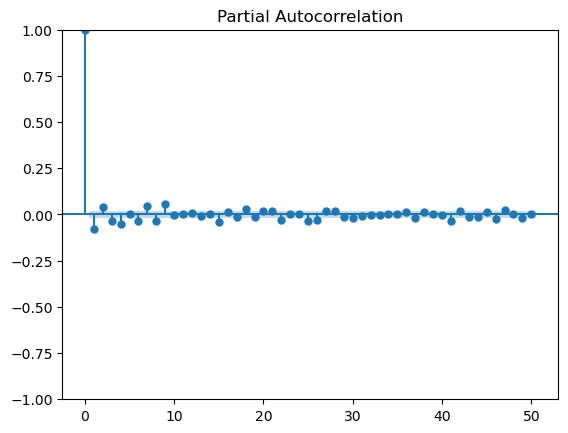

In [34]:
plot_pacf(df['Close_diff'].dropna(), lags=50)
plt.show()

In [35]:
results = []

### Arima

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [37]:
# Train-Test split
train_size = int(len(df)*0.8)
print(train_size)

8428


In [38]:
train,test = df['Close_diff'][:train_size],df['Close_diff'][train_size:]

In [39]:
print(train.size)
print(test.size)

8428
2107


In [40]:
model = ARIMA(train,order=(1,1,1))
result = model.fit()
print ('Model summary : ', result.summary())

C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model summary :                                 SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 8428
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32673.709
Date:                Fri, 26 Sep 2025   AIC                          65353.418
Time:                        18:41:45   BIC                          65374.535
Sample:                             0   HQIC                         65360.627
                               - 8428                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0535      0.006     -8.840      0.000      -0.065      -0.042
ma.L1         -0.9998      0.001  -1565.567      0.000      -1.001      -0.999
sigma2       136.2831      0.945   

In [41]:
print('ARIMA(1,1,1) - AIC:', result.aic, ' BIC:', result.bic)

ARIMA(1,1,1) - AIC: 65353.41772528509  BIC: 65374.53531363241


In [42]:
forecast = result.forecast(steps=len(test))
mse = mean_squared_error(test,forecast)
rmse = np.sqrt(mse)
print('ARIMA(1,1,1) - MSE: ',mse,' RMSE: ',rmse)

ARIMA(1,1,1) - MSE:  2023.009855645698  RMSE:  44.97788184925673


C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [43]:
results.append({'Model': 'ARIMA','RMSE': rmse})

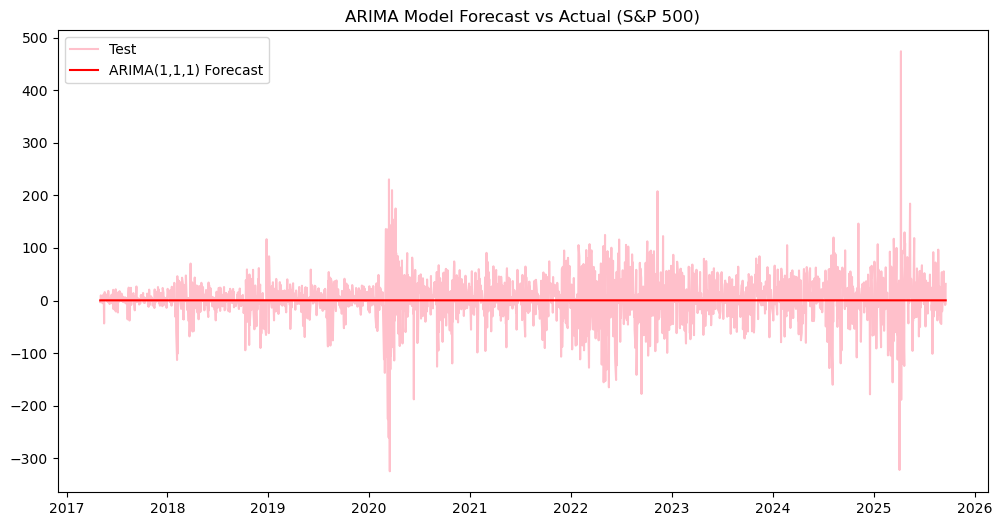

In [44]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test', color='pink')
plt.plot(test.index, forecast, label='ARIMA(1,1,1) Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual (S&P 500)')
plt.legend()
plt.show()

#### SARIMA

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
sarima1 = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,5))

C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
result_sarima1 = sarima1.fit()

In [48]:
print ('Model summary : ', result_sarima1.summary())

Model summary :                                       SARIMAX Results                                     
Dep. Variable:                        Close_diff   No. Observations:                 8428
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 5)   Log Likelihood              -32675.233
Date:                           Fri, 26 Sep 2025   AIC                          65360.467
Time:                                   18:41:57   BIC                          65395.660
Sample:                                        0   HQIC                         65372.482
                                          - 8428                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0548      0.006     -8.944      0.000      -0.067      -0.043
ma.L1         -0.9986     

In [49]:
print('SARIMA(1,1,1,5) - AIC:', result_sarima1.aic, ' BIC:', result_sarima1.bic)

SARIMA(1,1,1,5) - AIC: 65360.46692561307  BIC: 65395.65993865668


In [50]:
forecast_sarima1 = result_sarima1.forecast(steps=len(test))
mse = mean_squared_error(test,forecast_sarima1)
rmse = np.sqrt(mse)
print('SARIMA(1,1,1,5) - MSE: ',mse,' RMSE: ',rmse)

SARIMA(1,1,1,5) - MSE:  2020.828459322217  RMSE:  44.95362565269032


C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
results.append({'Model': 'SARIMA1','RMSE': rmse})

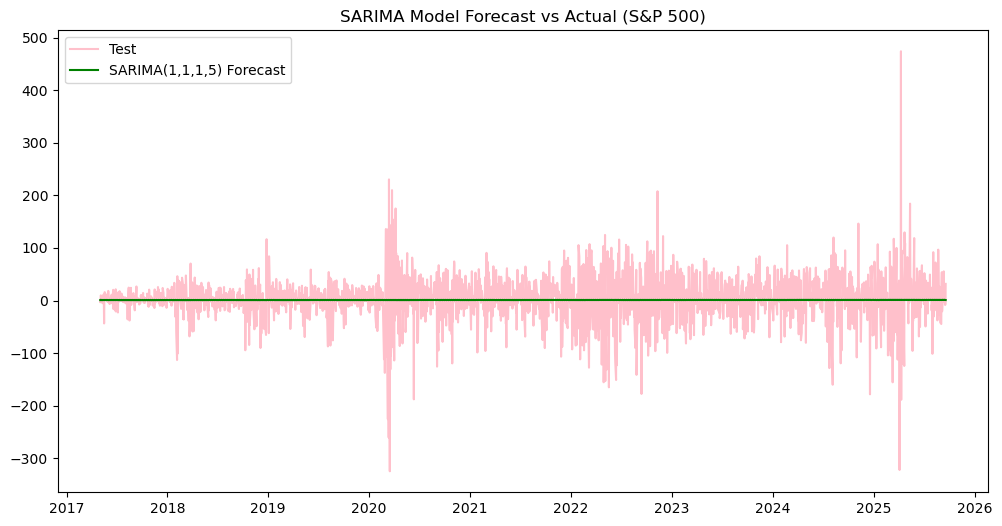

In [52]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test', color='pink')
plt.plot(test.index, forecast_sarima1, label='SARIMA(1,1,1,5) Forecast', color='green')
plt.title('SARIMA Model Forecast vs Actual (S&P 500)')
plt.legend()
plt.show()

In [53]:
sarima2 = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,21))

C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
result_sarima2 = sarima2.fit()

In [55]:
print ('Model summary : ', result_sarima2.summary())

Model summary :                                       SARIMAX Results                                      
Dep. Variable:                         Close_diff   No. Observations:                 8428
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 21)   Log Likelihood              -32656.890
Date:                            Fri, 26 Sep 2025   AIC                          65323.781
Time:                                    18:45:55   BIC                          65358.964
Sample:                                         0   HQIC                         65335.793
                                           - 8428                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0543      0.006     -8.807      0.000      -0.066      -0.042
ma.L1         -0.9

In [56]:
print('SARIMA(1,1,1,21) - AIC:', result_sarima2.aic, ' BIC:', result_sarima2.bic)

SARIMA(1,1,1,21) - AIC: 65323.7805502128  BIC: 65358.96405529063


In [57]:
forecast_sarima2 = result_sarima2.forecast(steps=len(test))
mse = mean_squared_error(test,forecast_sarima2)
rmse = np.sqrt(mse)
print('SARIMA(1,1,1,21) - MSE: ',mse,' RMSE: ',rmse)

C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\saswa\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA(1,1,1,21) - MSE:  2024.7352918220442  RMSE:  44.997058701897885


In [58]:
results.append({'Model': 'SARIMA2','RMSE': rmse,})

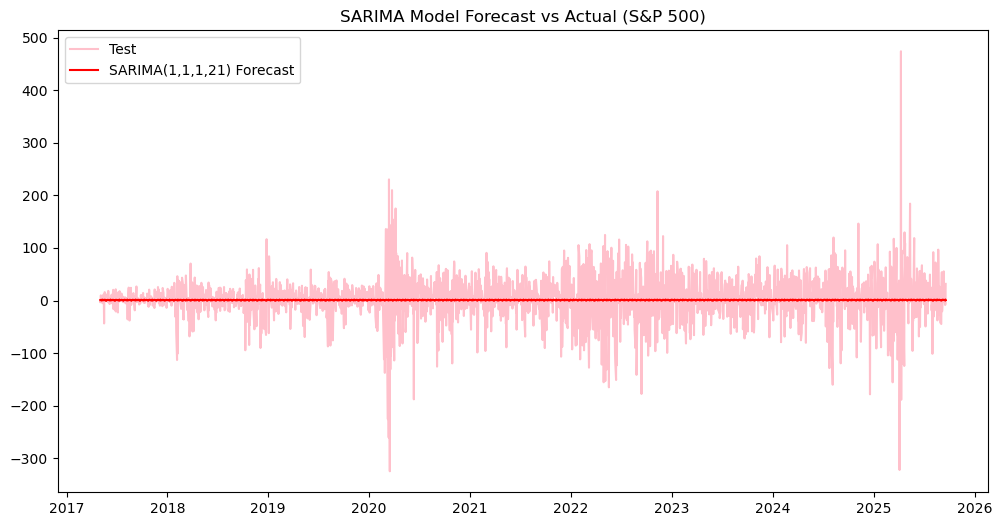

In [59]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Test', color='pink')
plt.plot(test.index, forecast_sarima2, label='SARIMA(1,1,1,21) Forecast', color='red')
plt.title('SARIMA Model Forecast vs Actual (S&P 500)')
plt.legend()
plt.show()

#### LSTM

In [60]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [61]:
# Scaling
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [62]:
# Train-Test Split
train_size = int(len(scaled_data)*0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [63]:
# Creating Sequence
def sequences(dataset, step=60):
    x, y = [], []
    for i in range(step, len(dataset)):
        x.append(dataset[i-step:i, 0])
        y.append(dataset[i, 0])              
    return np.array(x), np.array(y)

In [64]:
time_step = 60
x_train, y_train = sequences(train_data, time_step)
x_test, y_test = sequences(test_data, time_step)

In [65]:
# Reshaping for LSTM
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test  = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [66]:
model = Sequential([LSTM(50, input_shape=(x_train.shape[1], 1)), Dense(1)])

C:\Users\saswa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [68]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0015 - val_loss: 2.4396e-05
Epoch 2/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.1644e-05 - val_loss: 3.5507e-05
Epoch 3/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.2197e-05 - val_loss: 2.2904e-05
Epoch 4/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.0499e-05 - val_loss: 2.2525e-05
Epoch 5/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.0044e-05 - val_loss: 2.0175e-05
Epoch 6/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.0359e-05 - val_loss: 2.6296e-05
Epoch 7/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 9.8246e-06 - val_loss: 2.1299e-05
Epoch 8/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 9.3748e-06 - val_loss: 1.7437e-05
Epoch 9/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.9683e-06 - val_loss: 2.1482e-05
Epoch 10/10
236/236 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 8.6044e-06 - val_loss: 1.6363e-05


In [69]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [70]:
rmse = np.sqrt(np.mean((predictions - y_test_actual)**2))
print("LSTM RMSE:", rmse)

LSTM RMSE: 86.62330991622312


In [71]:
results.append({'Model': 'LSTM','RMSE': rmse})

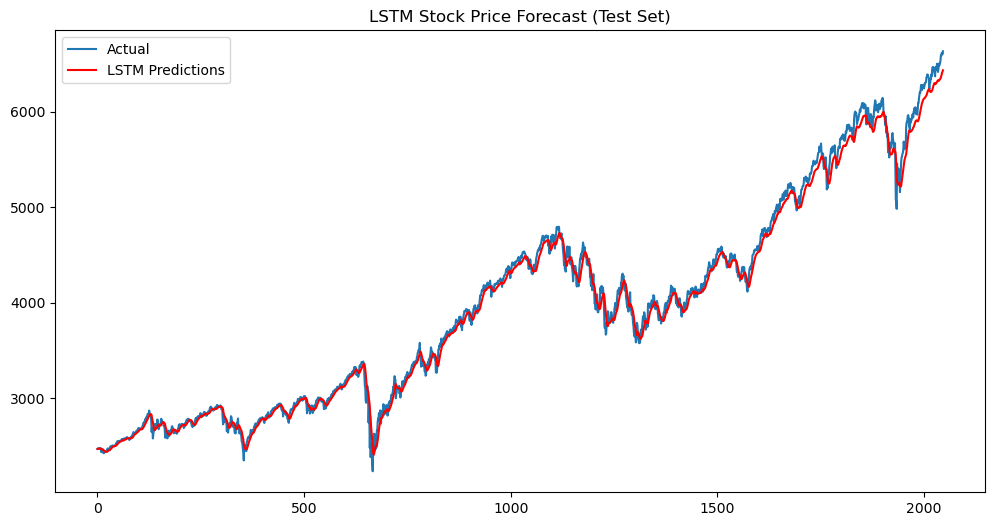

In [72]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual")
plt.plot(predictions, label="LSTM Predictions", color="red")
plt.title("LSTM Stock Price Forecast (Test Set)")
plt.legend()
plt.show()

#### Prophet

In [73]:
from prophet import Prophet

In [74]:
df1 = df.reset_index()[['Date', 'Close']]
df1.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [75]:
df1.head()

,ds,y
0,1983-11-28,166.539993
1,1983-11-29,167.910004
2,1983-11-30,166.399994
3,1983-12-01,166.490005
4,1983-12-02,165.440002


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10535 entries, 0 to 10534
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10535 non-null  datetime64[ns]
 1   y       10535 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 164.7 KB


In [77]:
train_size = int(len(df1) * 0.8)
train = df1[:train_size]
test = df1[train_size:]

In [78]:
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(train)

18:46:44 - cmdstanpy - INFO - Chain [1] start processing
18:46:48 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

In [80]:
y_true = test['y'].values
y_pred = forecast.iloc[-len(test):]['yhat'].values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('Prophet RMSE:', rmse)

Prophet RMSE: 1356.0639872816246


In [81]:
results.append({'Model': 'Prophet','RMSE': rmse})

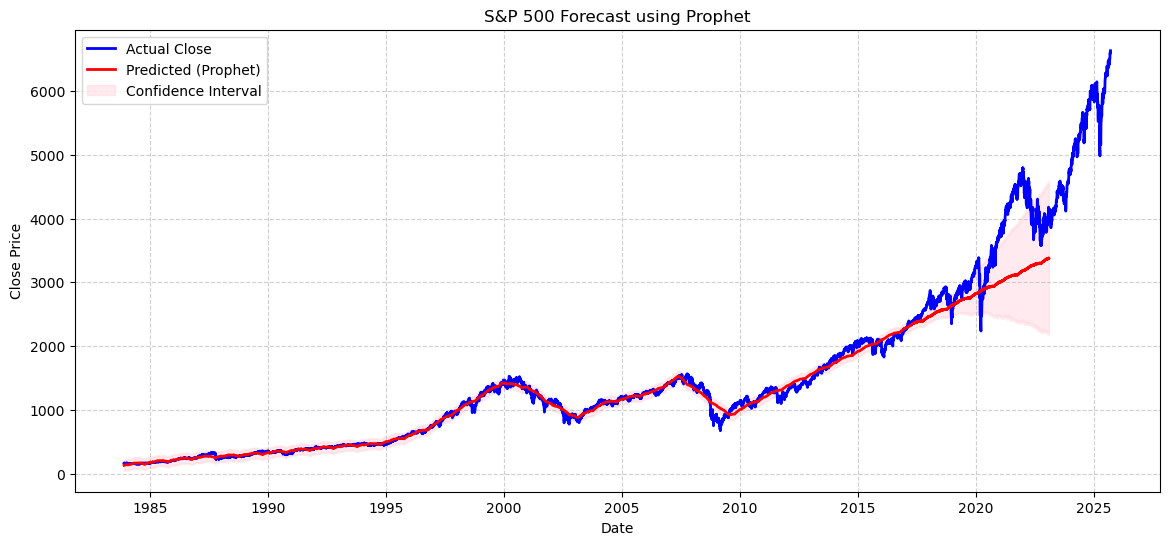

In [82]:
plt.figure(figsize=(14,6))
plt.plot(df1['ds'], df1['y'], label='Actual Close', color='blue', linewidth=2)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted (Prophet)', color='red', linewidth=2)
plt.fill_between(forecast['ds'],forecast['yhat_lower'],forecast['yhat_upper'],color='pink',alpha=0.3,label='Confidence Interval')
plt.title('S&P 500 Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [83]:
results = pd.DataFrame(results)
print(results)

     Model         RMSE
0    ARIMA    44.977882
1  SARIMA1    44.953626
2  SARIMA2    44.997059
3     LSTM    86.623310
4  Prophet  1356.063987
